
# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

### Importing dataset

In [2]:
file_path = 'PhD MRI+CTA+MRS 208+166.xlsx'
sheet_name = 'MRI+MRS 203'

data = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
data.head()

,Name,COMPLETE,Stroke volume,PRN,age,gender,date of onset,time of onset,date of admission,date of discharge,...,Lt Supraclinoid ICA,Lt Proximal M1 MCA,Lt Distal M1 MCA,Lt M2MCA rear,Lt M2 MCA forward,Lt A1 ACA,clot burden score,Lt ICA origin,Rt ICA origin,CCA
0,Pawar Uttam April,0.0,0.774902,2.400001e+11,67.0,1,2024-04-09 00:00:00,0.25,2024-04-11 00:00:00,00:00:00,...,2.0,2.0,2.0,1.0,1.0,1.0,20.0,1.0,1.0,Bilateral CCA plaques
1,Chavan Shivaji,0.0,1.748370,2.400001e+11,0.0,1,2024-06-28 00:00:00,0.5,2024-06-28 00:00:00,2024-07-01 00:00:00,...,2.0,2.0,1.0,1.0,1.0,1.0,19.0,1.0,1.0,NaN
2,Chandrabhagabai Gite,0.0,19.571100,2.400001e+11,77.0,2,2024-06-29 00:00:00,0.5,2024-06-30 00:00:00,2024-07-03 00:00:00,...,2.0,2.0,2.0,1.0,1.0,1.0,15.0,1.0,0.0,Right CCA plaque
3,Vijay Bhilane,0.0,22.167100,2.400001e+11,71.0,1,2024-06-30 00:00:00,0.333333,00:00:00,00:00:00,...,1.0,1.0,2.0,1.0,1.0,1.0,16.0,1.0,1.0,NaN
4,Navgire Omkar,0.0,1.312490,2.400000e+11,21.0,1,2024-05-01 00:00:00,0.729167,00:00:00,00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no cta


In [4]:
data.shape

(208, 73)

In [5]:
data.isna().sum()

Name                   0
COMPLETE              10
Stroke volume          0
PRN                    7
age                    1
                    ... 
Lt A1 ACA             42
clot burden score     42
Lt ICA origin         45
Rt ICA origin         45
CCA                  135
Length: 73, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           208 non-null    object 
 1   COMPLETE                       198 non-null    float64
 2   Stroke volume                  208 non-null    float64
 3   PRN                            201 non-null    float64
 4   age                            207 non-null    float64
 5   gender                         208 non-null    int64  
 6   date of onset                  159 non-null    object 
 7   time of onset                  144 non-null    object 
 8   date of admission              206 non-null    object 
 9   date of discharge              177 non-null    object 
 10  cell1                          199 non-null    float64
 11  cell2                          72 non-null     float64
 12  NIHSS                          204 non-null    flo

In [7]:
data.nunique()

Name                 206
COMPLETE               2
Stroke volume        204
PRN                  161
age                   61
                    ... 
Lt A1 ACA              2
clot burden score     10
Lt ICA origin          2
Rt ICA origin          2
CCA                   23
Length: 73, dtype: int64

### Selecting features manually

In [8]:
data.columns

Index(['Name', 'COMPLETE', 'Stroke volume', 'PRN', 'age', 'gender',
       'date of onset', 'time of onset', 'date of admission',
       'date of discharge', 'cell1', 'cell2', 'NIHSS', 'SHT', 'DM', 'Alcohol',
       'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
       'rheumatic heart disease', 'other risk factors', 'haemoglobin', 'PCV',
       'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'MRI', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12', 'other investigations',
       'strokevolume', 'MRI Brain', 'CT Angiography', 'Rt', 'CT ASPECTS',
       'TAN', 'MAS', 'MITEFF', 'MCTA', 'V54', 'ecosprine', 'clopidogril',
       'thrombolysis', 'thrombolytic agent', 'anticoagulation',
       'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
       'outcome good 1<=2, poor 2 >=3', 'barthel index', 'Rt infraclinoid ICA',
       'Rt Supraclinoid ICA', 'Rt Proximal M1 MCA', 'Rt Distal M1 MCA',
       'Rt M2MCA rear', 'Rt M2 MCA forward', 'Rt A1 ACA

In [9]:
# important_features = ['Name', 'COMPLETE', 'Stroke volume', 'PRN', 'age', 'gender',
#        'date of onset', 'time of onset', 'date of admission',
#        'date of discharge', 'cell1', 'cell2', 'NIHSS', 'SHT', 'DM', 'Alcohol',
#        'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
#        'rheumatic heart disease', 'other risk factors', 'haemoglobin', 'PCV',
#        'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'MRI', 'HDL Cholesterol',
#        'Triglycerides', 'V LDL', 'b 12', 'other investigations',
#        'strokevolume', 'MRI Brain', 'CT Angiography', 'Rt', 'CT ASPECTS',
#        'TAN', 'MAS', 'MITEFF', 'MCTA', 'V54', 'ecosprine', 'clopidogril',
#        'thrombolysis', 'thrombolytic agent', 'anticoagulation',
#        'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
#        'barthel index', 'Rt infraclinoid ICA', 'Rt Supraclinoid ICA',
#        'Rt Proximal M1 MCA', 'Rt Distal M1 MCA', 'Rt M2MCA rear',
#        'Rt M2 MCA forward', 'Rt A1 ACA', 'Lt infraclinoid ICA',
#        'Lt Supraclinoid ICA', 'Lt Proximal M1 MCA', 'Lt Distal M1 MCA',
#        'Lt M2MCA rear', 'Lt M2 MCA forward', 'Lt A1 ACA', 'clot burden score',
#        'Lt ICA origin', 'Rt ICA origin', 'CCA']

In [10]:
important_features = ['Name', 'Stroke volume', 'age', 'gender','NIHSS', 'SHT', 'DM', 'Alcohol',
       'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
       'rheumatic heart disease', 'haemoglobin', 'PCV',
       'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12',
       'CT ASPECTS','TAN', 'MAS', 'MITEFF', 'MCTA', 'mechanical thrombectomy', 
       'decompressive hemicranectomy','MRS']

In [11]:
# Remove 'MRS' and 'barthel index' from their current positions
important_features.remove('MRS')

# Append 'MRS' and 'barthel index' to the end
important_features.extend(['MRS'])

# Reorder the DataFrame columns
data = data[important_features]

In [12]:
data.head()

,Name,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,...,V LDL,b 12,CT ASPECTS,TAN,MAS,MITEFF,MCTA,mechanical thrombectomy,decompressive hemicranectomy,MRS
0,Pawar Uttam April,0.774902,67.0,1,4.0,1.0,1.0,2.0,2.0,2.0,...,159.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Chavan Shivaji,1.748370,0.0,1,8.0,1.0,1.0,2.0,2.0,2.0,...,133.0,519.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Chandrabhagabai Gite,19.571100,77.0,2,1.0,1.0,1.0,2.0,2.0,2.0,...,435.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0
3,Vijay Bhilane,22.167100,71.0,1,2.0,2.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Navgire Omkar,1.312490,21.0,1,0.0,2.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          208 non-null    object 
 1   Stroke volume                 208 non-null    float64
 2   age                           207 non-null    float64
 3   gender                        208 non-null    int64  
 4   NIHSS                         204 non-null    float64
 5   SHT                           207 non-null    float64
 6   DM                            207 non-null    float64
 7   Alcohol                       207 non-null    float64
 8   smoking                       207 non-null    float64
 9   tobacco                       207 non-null    float64
 10  dyslipidaemia                 207 non-null    float64
 11  atrial fibrillation           207 non-null    float64
 12  IHD                           207 non-null    float64
 13  rheum

- Storke Volume is Object , we need all the stroke volume as float

In [14]:
for index, value in data['Stroke volume'].items():
    # Check if each value can be converted to a float
    try:
        float(value)
    except ValueError:
        # If not a float, drop the row
        data.drop(index, inplace=True)

In [15]:
data.loc[:,'Stroke volume'] = pd.to_numeric(data['Stroke volume'], errors='coerce')

## Dealing with NULL values

- Checking Null Stroke Volume

In [16]:
data["Stroke volume"].isna().sum()

0

- Checking NULL MRS value

In [17]:
data['MRS'].isna().sum()

0

In [18]:
data.shape

(208, 32)

### Dropping NULL MRS and NULL Stroke Volume


In [19]:
data.dropna(subset=['MRS'], inplace=True)

In [20]:
data.shape

(208, 32)

In [21]:
data['Stroke volume'].isna().sum()

0

In [22]:
data.dropna(subset=['Stroke volume'],inplace =True)

In [23]:
data.drop(columns=["Name"], inplace=True)

In [24]:
data.head()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,...,V LDL,b 12,CT ASPECTS,TAN,MAS,MITEFF,MCTA,mechanical thrombectomy,decompressive hemicranectomy,MRS
0,0.774902,67.0,1,4.0,1.0,1.0,2.0,2.0,2.0,2.0,...,159.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.748370,0.0,1,8.0,1.0,1.0,2.0,2.0,2.0,2.0,...,133.0,519.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,19.571100,77.0,2,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,435.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0
3,22.167100,71.0,1,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.312490,21.0,1,0.0,2.0,2.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


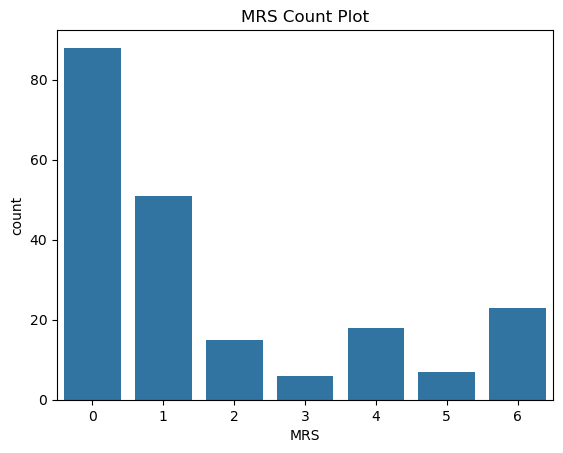

In [25]:
plt.figure()
plt.title('MRS Count Plot')
sns.countplot(data=data, x='MRS')
plt.show()

### Converting MRS to Good MRS and Bad MRS

In [26]:
# 1 = Good, 0 = Bad
data['MRS_Class'] = pd.Series()
for index, value in data['MRS'].items():
    if (value <= 2):
      data.loc[index,'MRS_Class'] = 1
    else:
      data.loc[index,'MRS_Class'] = 0

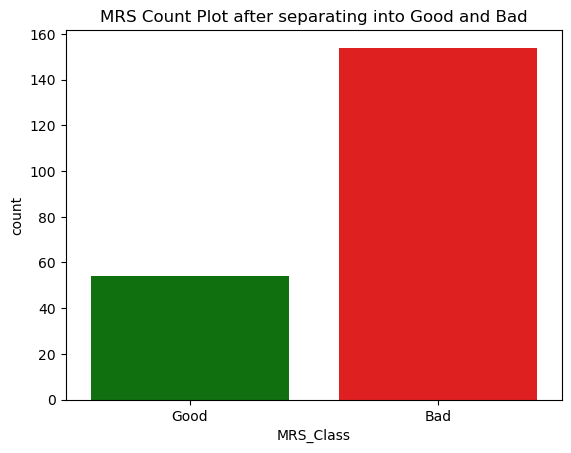

In [27]:
plt.figure()
plt.title('MRS Count Plot after separating into Good and Bad')

# Set the x variable to hue and use integer keys for the palette
sns.countplot(data=data, x='MRS_Class', hue='MRS_Class', palette={0: 'green', 1: 'red'}, legend=False)

# Set the custom x-tick labels
plt.xticks(ticks=[0, 1], labels=['Good', 'Bad'])

plt.show()

## Ajusting Binary Values

In [28]:
# Replace missing values with 0 and also convert 2.0 to 0 and 1.0 to 1
columns_to_modify = ['mechanical thrombectomy', 'decompressive hemicranectomy']

# Replace missing values with 0
data[columns_to_modify] = data[columns_to_modify].fillna(0)

# Replace 2.0 with 0 and 1.0 remains as 1
data[columns_to_modify] = data[columns_to_modify].replace(2.0, 0).replace(1.0, 1)

In [29]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {1, 2}]

for col in binary_columns:
    data.loc[data[col] == 2, col] = 0

In [30]:
data.reset_index(inplace=True, drop=True)

In [31]:
data.head()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,...,b 12,CT ASPECTS,TAN,MAS,MITEFF,MCTA,mechanical thrombectomy,decompressive hemicranectomy,MRS,MRS_Class
0,0.774902,67.0,1,4.0,1.0,1.0,0.0,0.0,0.0,0.0,...,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,1.748370,0.0,1,8.0,1.0,1.0,0.0,0.0,0.0,0.0,...,519.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,19.571100,77.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,22.167100,71.0,1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,1.312490,21.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [32]:
data.to_csv('Cleaned_Data.csv', index=False)
data = pd.read_csv('Cleaned_Data.csv')

## Correlation Matrix

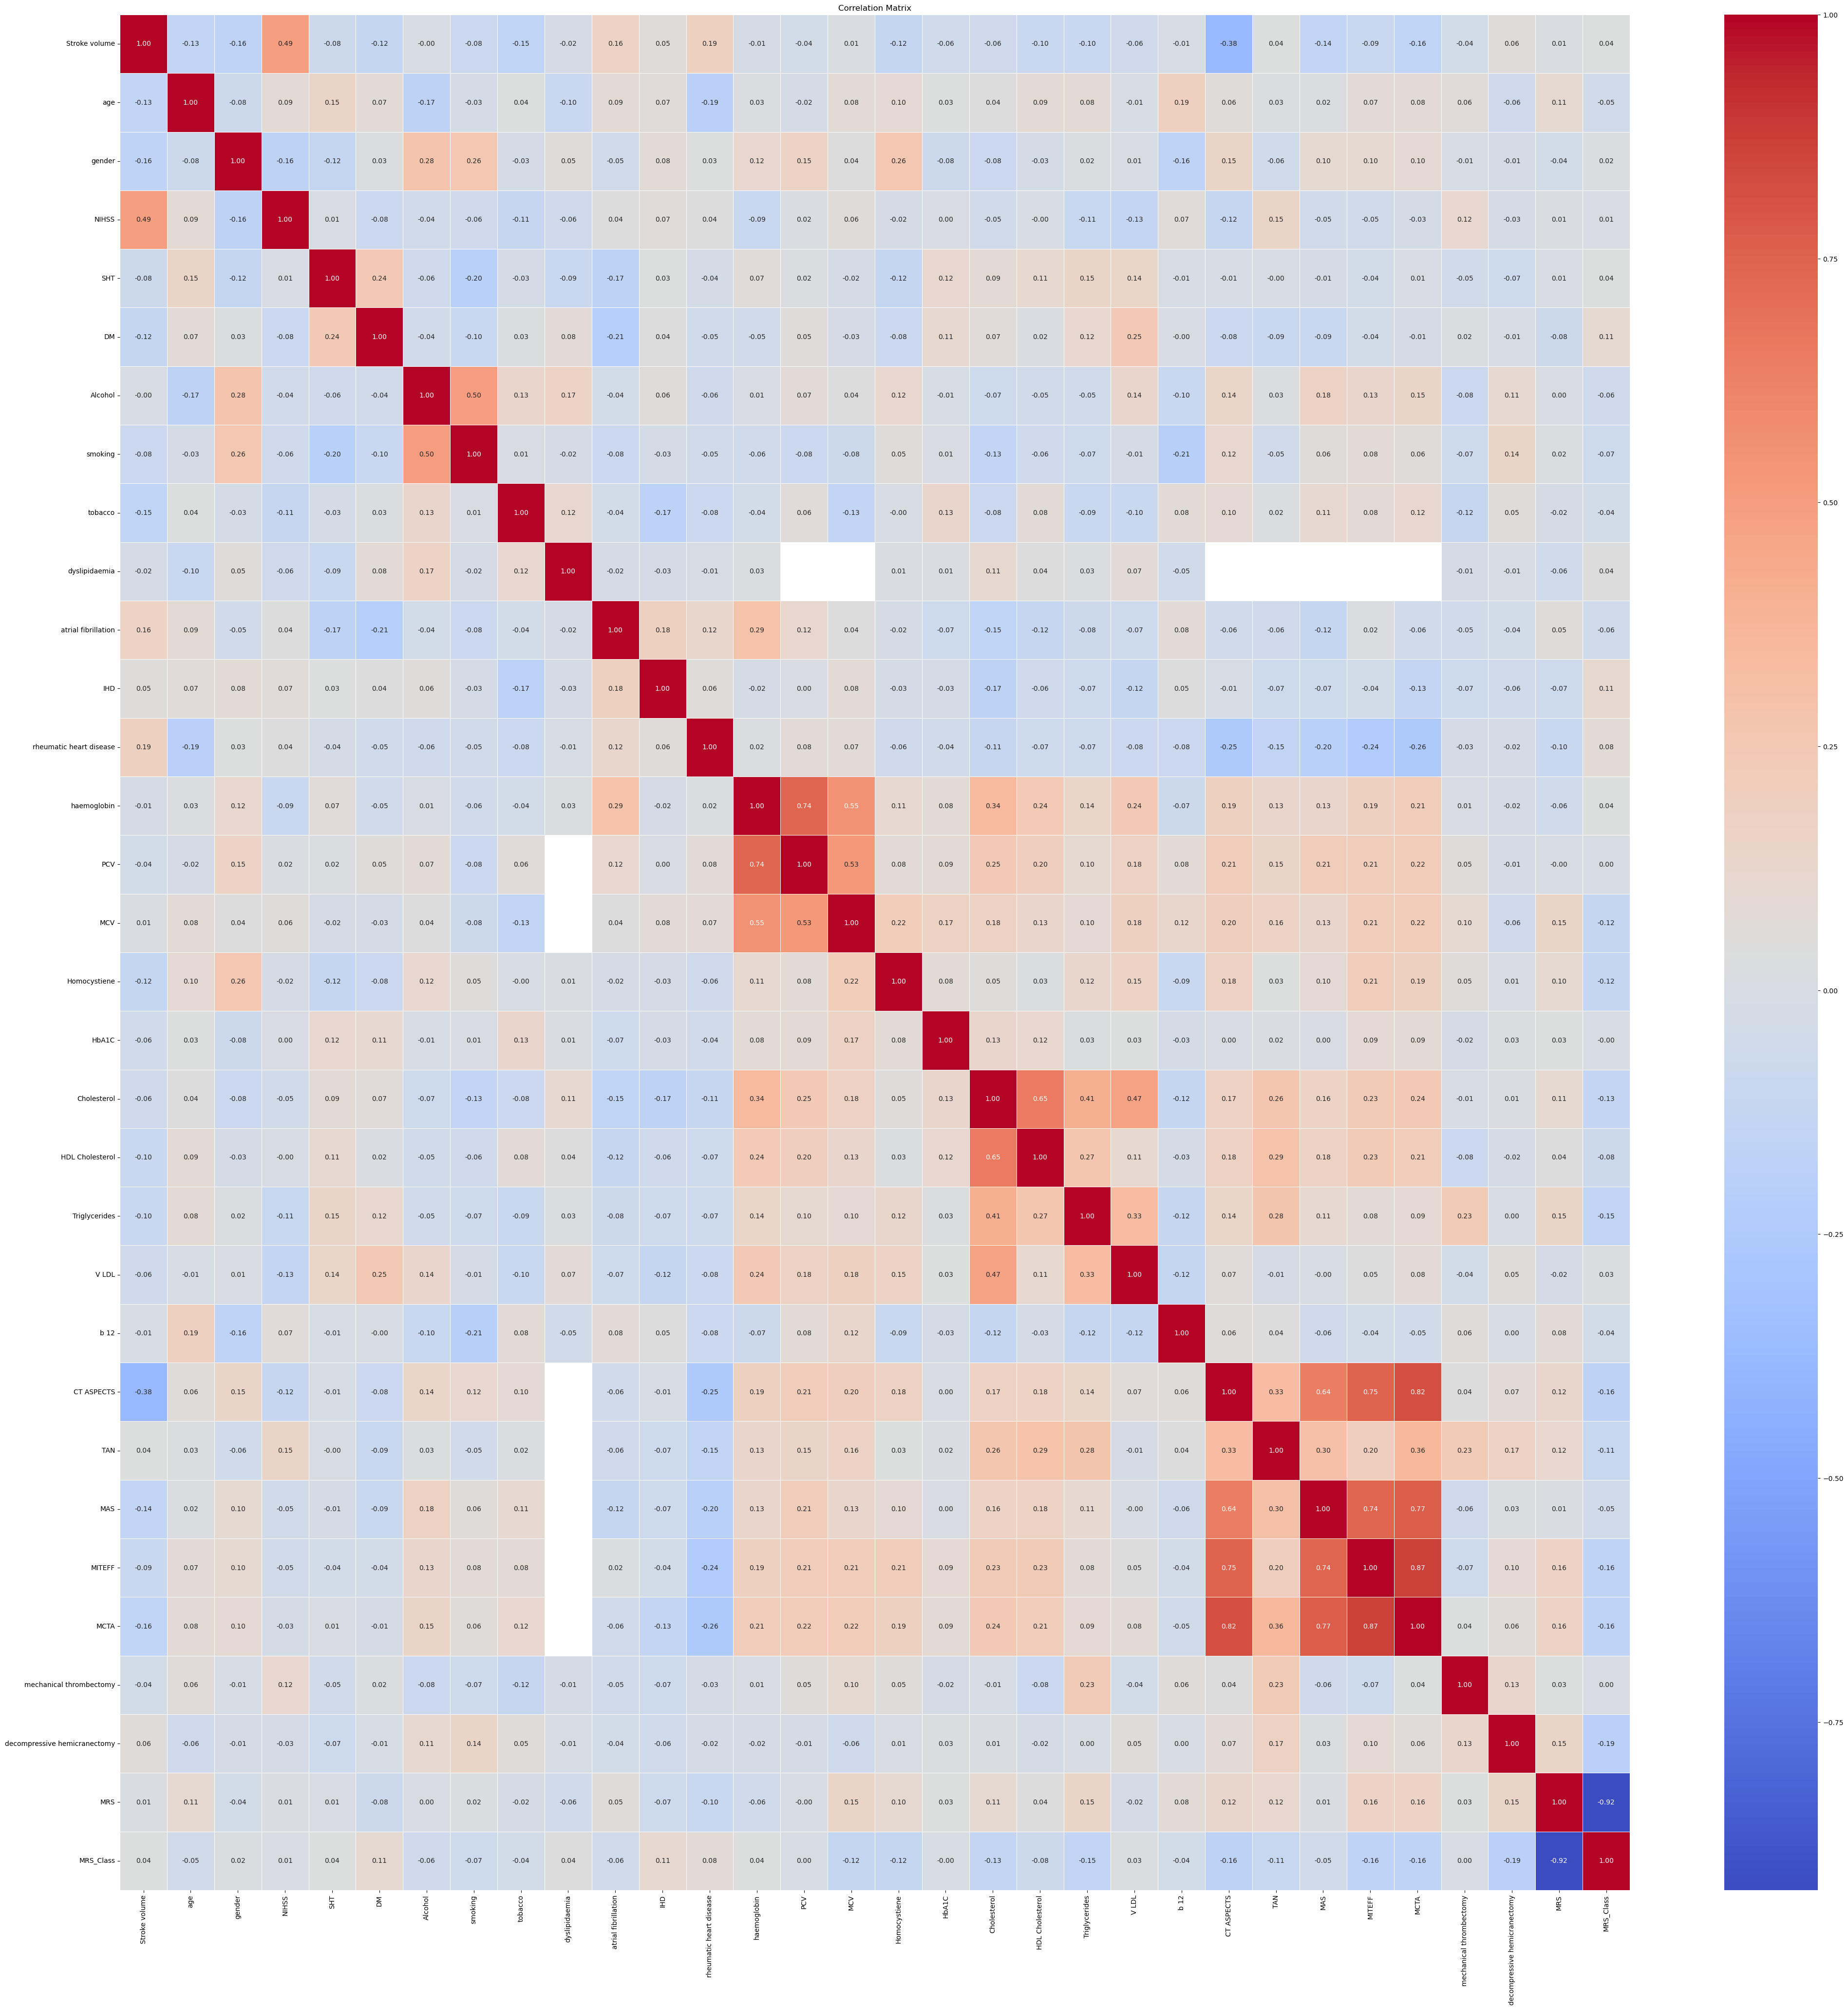

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Extraction

In [34]:
y = data.iloc[:,-1].values
X = data.drop(columns=["MRS", "MRS_Class"])
X = X.to_numpy()

In [35]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
X

array([[ 0.774902, 67.      ,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 1.74837 ,  0.      ,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       [19.5711  , 77.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 7.09035 , 63.      ,  1.      , ...,       nan,  0.      ,
         0.      ],
       [ 0.251843, 76.      ,  1.      , ...,       nan,  0.      ,
         0.      ],
       [ 0.794275, 59.      ,  1.      , ...,       nan,  0.      ,
         0.      ]])

In [37]:
X.shape

(208, 30)

## Preprocessing Pipeline

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [39]:
data.isna().sum()

Stroke volume                    0
age                              1
gender                           0
NIHSS                            4
SHT                              1
DM                               1
Alcohol                          1
smoking                          1
tobacco                          1
dyslipidaemia                    1
atrial fibrillation              1
IHD                              1
rheumatic heart disease          1
haemoglobin                      8
PCV                             28
MCV                             95
Homocystiene                    22
HbA1C                           40
Cholesterol                     51
HDL Cholesterol                 51
Triglycerides                   67
V LDL                           52
b 12                            33
CT ASPECTS                      61
TAN                             68
MAS                             69
MITEFF                          68
MCTA                            69
mechanical thrombect

In [40]:
# Identify binary features
binary_features = [col for col in data.columns if set(data[col].dropna().unique()) == {0, 1}]
binary_features.remove('MRS_Class')

# Get indices of binary features in the DataFrame
binary_features_indices = [data.columns.get_loc(feature) for feature in binary_features]

# Create the binary transformer
binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

In [41]:
data.columns[binary_features_indices]

Index(['gender', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco', 'dyslipidaemia',
       'atrial fibrillation', 'IHD', 'rheumatic heart disease',
       'mechanical thrombectomy', 'decompressive hemicranectomy'],
      dtype='object')

In [42]:
# Identify numeric features by excluding the binary features from the DataFrame
numeric_features = [col for col in data.columns if col not in binary_features]
# Remove both 'MRS_Class' and 'MRS' in a single line
numeric_features = [feature for feature in numeric_features if feature not in ['MRS_Class', 'MRS']]

# Get indices of numeric features in the DataFrame
numeric_features_indices = [data.columns.get_loc(feature) for feature in numeric_features]

# Create the numeric transformer
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

In [43]:
data.columns[numeric_features_indices]

Index(['Stroke volume', 'age', 'NIHSS', 'haemoglobin', 'PCV', 'MCV',
       'Homocystiene', 'HbA1C', 'Cholesterol', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12', 'CT ASPECTS', 'TAN', 'MAS', 'MITEFF',
       'MCTA'],
      dtype='object')

In [44]:
# Create the column transformer for the entire preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_indices),
        ("bin", binary_transformer, binary_features_indices),
    ]
)

In [45]:
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

## Feature Selection

In [46]:
base_classifier = RandomForestClassifier()
selector = RFE(estimator=base_classifier, n_features_to_select=15)

## Importing Different Models

Top 7 Models:
1. LGMBClassifier
2. GradientBoostingClassifier
3. XGBoostClassifier
4. BaggingClassifier
5. AdaBoostClassifier
6. DecisionTreeClassifier
7. RandomForestClassifier


In [47]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
import warnings

## Model Pipeline

In [48]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessing_pipeline),
        ('feature_selection', selector),
        ('classifier', base_classifier)
    ]
)

## Cross Validation Pipeline

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [50]:
# Define parameters for GridSearchCV
param_grid = [
    # Parameters for RFE
    {'feature_selection__n_features_to_select': [10, 15, 20, 30]},  # Specify the number of features to select
    # Parameters for Decision Tree
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 10, None],
        'classifier__criterion': ['gini', 'entropy']
    },
    # Parameters for Random Forest
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 20, 30],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__bootstrap': [True]
    },
    # Parameters for AdaBoost
    {
        'classifier': [AdaBoostClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=3)]
    },
    # Parameters for Gradient Boosting
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__max_depth': [3, 5]
    },
    # Parameters for XGBoost
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.1, 0.01]
    },
    # Parameters for LGBM
    {
        'classifier': [LGBMClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__learning_rate': [0.1, 0.01]
    },
    # Parameters for Bagging Classifier
    {
        'classifier': [BaggingClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=5)]
    }
]

In [51]:
# params = [param1, param2, param3, param4, param5, param6, param7]

In [52]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [53]:
# grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit=False, verbose=2)
# grid.fit(X, y)

In [54]:
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit='f1', verbose=2)
grid.fit(X, y)

Fitting 10 folds for each of 78 candidates, totalling 780 fits
[CV] END .........feature_selection__n_features_to_select=10; total time=   2.3s
[CV] END .........feature_selection__n_features_to_select=10; total time=   2.2s
[CV] END .........feature_selection__n_features_to_select=10; total time=   2.2s
[CV] END .........feature_selection__n_features_to_select=10; total time=   2.3s
[CV] END .........feature_selection__n_features_to_select=10; total time=   2.2s
[CV] END .........feature_selection__n_features_to_select=10; total time=   2.3s
[CV] END .........feature_selection__n_features_to_select=10; total time=   2.2s
[CV] END .........feature_selection__n_features_to_select=10; total time=   2.2s
[CV] END .........feature_selection__n_features_to_select=10; total time=   2.2s
[CV] END .........feature_selection__n_features_to_select=10; total time=   2.2s
[CV] END .........feature_selection__n_features_to_select=15; total time=   1.7s
[CV] END .........feature_selection__n_feature

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   2.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   1.9s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   1.9s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   1.9s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   1.9s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   1.9s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   1.9s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   2.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   2.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   2.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   2.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   1.7s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   1.8s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   1.9s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   2.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   2.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   1.9s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   1.9s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   1.9s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   2.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   2.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   2.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   2.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   1.7s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   1.7s
[CV] END classifier=GradientBoostingClassifier()

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('scaler',
                                                                                                           MinMaxScaler())]),
                                                                                          [0,
                                                                                           1,
                                                                                           3,
                                                                                           13,
                                                                                           14,
                                                                                           15,
                                                                                           16,
                                                                                           17,
                                                                                           18,
                                                                                           19,
                                                                                           20,
                                                                                           21,
                                                                                           22,
                                                                                           23,
                                                                                           24,
                                                                                           25,
                                                                                           26,
                                                                                           27]),
                                                                                         ('bin',
                                                                                          Pipeline(steps=[('imput...
                         {'classifier': [LGBMClassifier()],
                          'classifier__learning_rate': [0.1, 0.01],
                          'classifier__max_depth': [3, 5, 10],
                          'classifier__n_estimators': [50, 100, 200]},
                         {'classifier': [BaggingClassifier()],
                          'classifier__estimator': [DecisionTreeClassifier(max_depth=5)],
                          'classifier__n_estimators': [50, 100]}],
             refit='f1',
             scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard',
                      'balanced_accuracy'],
             verbose=2)

In [64]:
import joblib

# Save the entire GridSearchCV object
grid_filename = 'GSCV_FS_MRI.pkl'
joblib.dump(grid, grid_filename)

print(f"Complete GridSearchCV model saved as '{grid_filename}'")

Complete GridSearchCV model saved as 'GSCV_FS_MRI.pkl'


In [60]:
print(grid.best_params_)

{'classifier': AdaBoostClassifier(), 'classifier__estimator': DecisionTreeClassifier(max_depth=3), 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}


In [56]:
print(grid.best_score_)

0.9309669059756576


In [1]:
from datetime import datetime

# List of scoring metrics used in GridSearchCV
scoring_metrics = ['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy']

# Extracting the parameter settings for each run and combining them into one column
params_summary = grid.cv_results_['params']
combined_params = [str(param_set) for param_set in params_summary]

# Creating an initial DataFrame with combined parameters
df = pd.DataFrame({'Parameters': combined_params})

# Adding mean scores for each scoring metric to the DataFrame
for metric in scoring_metrics:
    mean_score_key = f'mean_test_{metric}'
    
    if mean_score_key in grid.cv_results_:
        # Extract the mean scores and add to the DataFrame
        df[f'Mean {metric.capitalize()} Score'] = np.round_(grid.cv_results_[mean_score_key], 6)
    else:
        print(f"Metric '{metric}' not found in cv_results_")

# Sorting by F1 Score as it was the refit metric
df = df.sort_values(by='Mean F1 Score', ascending=False)

# Saving the DataFrame to an Excel file
current_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
result_filename = 'MRS Prediction Results MRI only FS-' + current_datetime + '.xlsx'
df.to_excel(result_filename, index=False)

print(f"Results saved to {result_filename}")


NameError: name 'grid' is not defined

In [58]:
# Access the best estimator from the GridSearchCV
best_pipeline = grid.best_estimator_

# Access the feature selection step (RFE) from the pipeline
rfe_step = best_pipeline.named_steps['feature_selection']

# Get the mask of selected features (True for selected features)
selected_features_mask = rfe_step.support_

# Get the ranking of all features
feature_ranking = rfe_step.ranking_

# Print selected features and their rankings
print("Selected Features Mask:", selected_features_mask)
print("Feature Ranking:", feature_ranking)

# If you want the names of the features that were selected:
all_features = list(data.columns)  # Get all feature names from your data
selected_features = [feature for feature, selected in zip(all_features, selected_features_mask) if selected]

print("Selected Features:", selected_features)

Selected Features Mask: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False False False False False False False False
 False False False False False False]
Feature Ranking: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  5  1  6  4 11  3  8 10  9  7
 15 13 12 16 14  2]
Selected Features: ['Stroke volume', 'age', 'gender', 'NIHSS', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD', 'rheumatic heart disease', 'haemoglobin', 'MCV']
